In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Purpose of the Task

- Load the dataet into an analysis tool


- Doing some basic checks - are there any issues? Does the data need to be cleaned?


- Gather some interesting overall insights about the data (ex: What is the average transaction amount? How many transactions do customers make each month, on average?)


- Segment the dataset by transaction date and time. Visualise transaction volumne and spending over the course of an average day or week. Consider the effect of any outliers that may distort the analysis


- What insights can be drawn from the location information provided in the dataset


- Summarising the most interesting findings to ANZ

# Loading Dataset

In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\zipzi\\Downloads')

In [3]:
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Basic Checks

In [4]:
# Checking the dataset shape
print('Number of Observations and Number of Variables\n',data.shape)
print('Number of Observation\n',data.shape[0])
print('Number of Variables\n',data.shape[1])

Number of Observations and Number of Variables
 (12043, 23)
Number of Observation
 12043
Number of Variables
 23


In [5]:
#Displaying the complete Meta-data of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [6]:
#Checking null values
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

<AxesSubplot:>

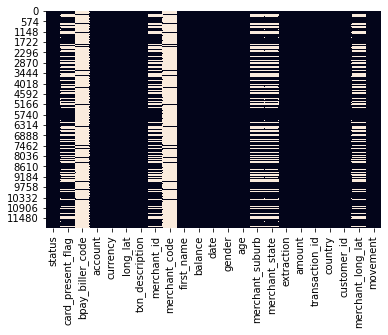

In [7]:
sns.heatmap(data.isnull(),cbar=False)

In [8]:
#Checking duplicated values
data[data.duplicated()].sum()

status               0.0
card_present_flag    0.0
bpay_biller_code     0.0
account              0.0
currency             0.0
long_lat             0.0
txn_description      0.0
merchant_id          0.0
merchant_code        0.0
first_name           0.0
balance              0.0
date                 0.0
gender               0.0
age                  0.0
merchant_suburb      0.0
merchant_state       0.0
extraction           0.0
amount               0.0
transaction_id       0.0
country              0.0
customer_id          0.0
merchant_long_lat    0.0
movement             0.0
dtype: float64

In [9]:
#Displaying the Variables' names and their Datatypes
data.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [10]:
#Counting the number of Non-Missing Values for eacch Variable
data.count()

status               12043
card_present_flag     7717
bpay_biller_code       885
account              12043
currency             12043
long_lat             12043
txn_description      12043
merchant_id           7717
merchant_code          883
first_name           12043
balance              12043
date                 12043
gender               12043
age                  12043
merchant_suburb       7717
merchant_state        7717
extraction           12043
amount               12043
transaction_id       12043
country              12043
customer_id          12043
merchant_long_lat     7717
movement             12043
dtype: int64

# Data Cleaning

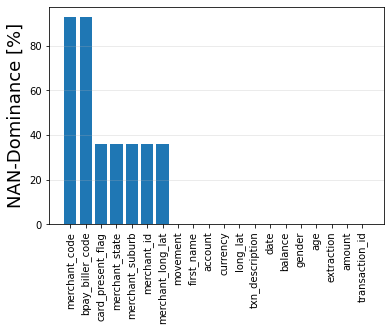

In [11]:
# Calculating the percentage of null values within columns
total_nans = data.isnull().sum().sort_values(ascending=False)
percent_nans = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=True)


data_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])

#Plotting percentage of null values among columns within the dataset
plt.bar(np.arange(20), data_nans['Percent NaN'].iloc[:20].values.tolist())
plt.xticks(np.arange(20), data_nans['Percent NaN'].iloc[:20].index.values.tolist(), rotation='90')
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [12]:
# Setting the percentage threshold of null values within a column
# Setting the threshold at 80%
test_nan_level = 0.8 
print(data_nans.quantile(test_nan_level))
_, thresh_nan = data_nans.quantile(test_nan_level)

Total NaN      4326.000000
Percent NaN      35.921282
Name: 0.8, dtype: float64


In [13]:
print(f'INITIAL NUMBER OF VARIABLES: {data.shape[1]}')
print()
data_test1 = data.drop((data_nans[data_nans['Percent NaN'] > thresh_nan]).index, 1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {data_test1.shape[1]}')
print()

INITIAL NUMBER OF VARIABLES: 23

NUMBER OF VARIABLES AFTER NaN THRESHOLD 35.92%: 21



In [14]:
data_test1.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement'],
      dtype='object')

In [15]:
#Import imputation from sklearn
from sklearn.impute import SimpleImputer

#Imputing values into the missing values
imp = SimpleImputer(strategy='most_frequent')
imp.fit(data_test1) 

imputed_data = imp.transform(data_test1.values)

In [16]:
imputed_data

array([['authorized', 1.0, 'ACC-1598451071', ..., 'CUS-2487424745',
        '153.38 -27.99', 'debit'],
       ['authorized', 0.0, 'ACC-1598451071', ..., 'CUS-2487424745',
        '151.21 -33.87', 'debit'],
       ['authorized', 1.0, 'ACC-1222300524', ..., 'CUS-2142601169',
        '151.21 -33.87', 'debit'],
       ...,
       ['authorized', 1.0, 'ACC-3827517394', ..., 'CUS-2663907001',
        '150.92 -33.74', 'debit'],
       ['authorized', 1.0, 'ACC-2920611728', ..., 'CUS-1388323263',
        '145.09 -37.91', 'debit'],
       ['authorized', 1.0, 'ACC-1443681913', ..., 'CUS-3129499595',
        '151.19 -33.93', 'debit']], dtype=object)

In [17]:
cleaned_data=pd.DataFrame(imputed_data)
cleaned_data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,authorized,1,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.2,2018-08-01,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.9,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.1,2018-10-31,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.6,2018-10-31,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.7,2018-10-31,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [18]:
cleaned_data.columns=['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement']
cleaned_data

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.2,2018-08-01,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.9,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.1,2018-10-31,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.6,2018-10-31,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.7,2018-10-31,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [19]:
#Changing datatype back to numeric for 3 variables
cleaned_data[['age','balance','amount']]=cleaned_data[['age','balance','amount']].apply(pd.to_numeric)

In [20]:
#Descriptive statistical summary for numeric variables
cleaned_data.describe()

,balance,age,amount
count,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588
std,31503.722652,10.046343,592.599934
min,0.240000,18.000000,0.100000
25%,3158.585000,22.000000,16.000000
50%,6432.010000,28.000000,29.000000
75%,12465.945000,38.000000,53.655000
max,267128.520000,78.000000,8835.980000


In [21]:
#Descriptive summary for all variables within the dataset
cleaned_data.describe(include='all')

<ipython-input-21-edadc0f87375>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cleaned_data.describe(include='all')


,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,12043.0,12043,12043,12043,12043,12043,12043,12043.000000,12043,...,12043.000000,12043,12043,12043,12043.000000,12043,12043,12043,12043,12043
unique,2,2.0,100,1,100,6,5725,80,NaN,91,...,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,NaN,2018-09-28 00:00:00,...,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,7b94f2986ad14a958a270ecb2da27ea5,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,10520.0,578,12043,578,3934,4340,746,NaN,174,...,NaN,4581,6495,10,NaN,1,12043,578,4471,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-31 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14704.195553,NaN,...,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31503.722652,NaN,...,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240000,NaN,...,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3158.585000,NaN,...,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

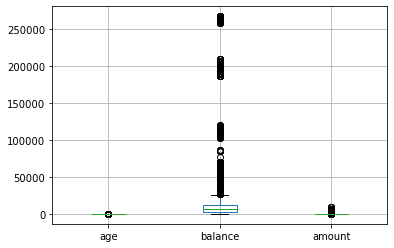

In [22]:
#Plotting bos plot to find out if there is any outliers 
numeric_col=['age','balance','amount']
cleaned_data.boxplot(numeric_col)

In [23]:
def cap_data(cleaned_data):
    for col in cleaned_data:
        print("capping the ",col)
        if (((cleaned_data[col].dtype)=='float64') | ((cleaned_data[col].dtype)=='int64')):
            percentiles = cleaned_data[col].quantile([0.01,0.99]).values
            cleaned_data[col][cleaned_data[col] <= percentiles[0]] = percentiles[0]
            cleaned_data[col][cleaned_data[col] >= percentiles[1]] = percentiles[1]
        else:
            cleaned_data[col]=cleaned_data[col]
    return cleaned_data

final_cleaned_data=cap_data(cleaned_data)

capping the  status
capping the  card_present_flag
capping the  account
capping the  currency
capping the  long_lat
capping the  txn_description
capping the  merchant_id
capping the  first_name
capping the  balance
capping the  date
capping the  gender
capping the  age
capping the  merchant_suburb
capping the  merchant_state
capping the  extraction
capping the  amount
capping the  transaction_id
capping the  country
capping the  customer_id
capping the  merchant_long_lat
capping the  movement


<ipython-input-23-3c68ff9ec330>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col][cleaned_data[col] <= percentiles[0]] = percentiles[0]
<ipython-input-23-3c68ff9ec330>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col][cleaned_data[col] >= percentiles[1]] = percentiles[1]
<ipython-input-23-3c68ff9ec330>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col][cleaned_data[col] <= percentiles[0

In [24]:
final_cleaned_data.describe()

,balance,age,amount
count,12043.000000,12043.000000,12043.000000
mean,14350.936039,30.556921,178.242232
std,28954.309632,9.937162,521.148069
min,152.705000,18.000000,4.308400
25%,3158.585000,22.000000,16.000000
50%,6432.010000,28.000000,29.000000
75%,12465.945000,38.000000,53.655000
max,201963.445200,69.000000,3195.010000


# Exploring Insights

In [25]:
#Counting the number of transactions made in each month
final_cleaned_data.groupby([data['date'].dt.month],sort=False)['transaction_id'].count()

date
8     3943
9     4013
10    4087
Name: transaction_id, dtype: int64

Gather some interesting overall insights about the data (ex: What is the average transaction amount? How many transactions do customers make each month, on average?)


- Average transaction amount: 178.242232


- There 3943 transactions during August, 4013 during September and 4087 in 
  October
 

In [26]:
#Calculating the recency of the transactions
recent_transaction = final_cleaned_data['date'].max()
final_cleaned_data['recency']= recent_transaction - final_cleaned_data['date']
final_cleaned_data['recency']/= np.timedelta64(1,'D')
final_cleaned_data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,recency
0,authorized,1,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,152.705,2018-08-01,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.2500,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,91.0
1,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,152.705,2018-08-01,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.1900,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,91.0
2,authorized,1,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,152.705,2018-08-01,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.4200,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,91.0
3,authorized,1,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.220,2018-08-01,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.9000,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,91.0
4,authorized,1,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,152.705,2018-08-01,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,4.3084,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,91.0


In [103]:
#Creating the RFM table
rfmtable = final_cleaned_data.groupby('customer_id').agg({'recency': lambda x:x.min(),
                                                         'customer_id': lambda x:len(x),
                                                         'balance': lambda x: x.sum()})

rfmtable.rename (columns={
    'recency':'recency',
    'customer_id':'frequency',
    'balance': 'monetary_value'
},inplace=True)

In [104]:
rfmtable.head()

,recency,frequency,monetary_value
customer_id,,,
CUS-1005756958,1.0,73,166541.03
CUS-1117979751,0.0,100,982992.90
CUS-1140341822,0.0,80,455936.98
CUS-1147642491,0.0,118,1065875.26
CUS-1196156254,0.0,245,5456746.27


In [105]:
#checking the rfm table shape
rfmtable.shape

(100, 3)

In [106]:
#Showing the quartiles table
quartiles=rfmtable.quantile(q=[0.25,0.5,0.75])
quartiles

,recency,frequency,monetary_value
0.25,0.0,77.75,4.924240e+05
0.50,0.0,109.50,8.150159e+05
0.75,2.0,141.75,1.577290e+06


In [107]:
# Ranking the values based on the quartiles of each variable
def ROencoder(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
def FMOencoder (x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [108]:
#Applying the formula above
rfmseg=rfmtable
rfmseg['r_score']=rfmseg['recency'].apply(ROencoder,args=('recency',quartiles))
rfmseg['f_score']=rfmseg['frequency'].apply(FMOencoder,args=('frequency',quartiles))
rfmseg['m_score']=rfmseg['monetary_value'].apply(FMOencoder,args=('monetary_value',quartiles))
rfmseg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
CUS-1005756958,1.0,73,166541.03,3,4,4
CUS-1117979751,0.0,100,982992.90,1,3,2
CUS-1140341822,0.0,80,455936.98,1,3,4
CUS-1147642491,0.0,118,1065875.26,1,2,2
CUS-1196156254,0.0,245,5456746.27,1,1,1


In [109]:
#calculate the rfm score with the bias
rfmseg['rfm_class']=100*rfmseg['r_score']+10*rfmseg['f_score']+rfmseg['m_score']
rfmseg['total_score']=rfmseg['r_score']+rfmseg['f_score']+rfmseg['m_score']
rfmseg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
CUS-1005756958,1.0,73,166541.03,3,4,4,344,11
CUS-1117979751,0.0,100,982992.90,1,3,2,132,6
CUS-1140341822,0.0,80,455936.98,1,3,4,134,8
CUS-1147642491,0.0,118,1065875.26,1,2,2,122,5
CUS-1196156254,0.0,245,5456746.27,1,1,1,111,3


In [110]:
rfm_quartiles=(rfmseg['rfm_class'].min(),rfmseg['rfm_class'].quantile(q=0.25),
              rfmseg['rfm_class'].median(),rfmseg['rfm_class'].quantile(q=0.75),
              rfmseg['rfm_class'].max())
rfm_quartiles

(111, 122.0, 134.0, 333.25, 444)

In [111]:
#Classify customers based on the rfm score
def RFMclassencoder (x,p,d):
    if x<=d[0]:
        return 'platium'
    elif x<=d[1]:
        return 'gold'
    elif x<=d[2]:
        return 'silver'
    elif x<=d[3]:
        return 'bronze'
    elif x<d[4]:
        return 'almost lost'
    else:
        return 'lost'
rfmseg['customer_title']=rfmseg['rfm_class'].apply(RFMclassencoder,args=('rfm_class',rfm_quartiles))
rfmseg.head()
    

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
CUS-1005756958,1.0,73,166541.03,3,4,4,344,11,almost lost
CUS-1117979751,0.0,100,982992.90,1,3,2,132,6,silver
CUS-1140341822,0.0,80,455936.98,1,3,4,134,8,silver
CUS-1147642491,0.0,118,1065875.26,1,2,2,122,5,gold
CUS-1196156254,0.0,245,5456746.27,1,1,1,111,3,platium


In [112]:
#Printing the customer with the most transactions within the dataset
df_frequency=final_cleaned_data
df_frequency=df_frequency.groupby('customer_id')['transaction_id'].nunique()
df_frequency.reset_index()
df_frequency.columns=['customer_id','frequency']
df_frequency.sort_values(ascending=False).head(5)

customer_id
CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
Name: transaction_id, dtype: int64

<AxesSubplot:ylabel='Frequency'>

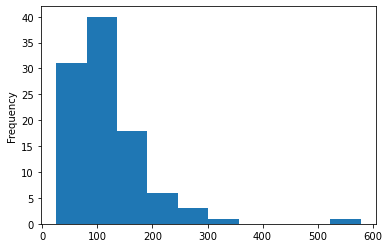

In [113]:
df_frequency.plot(kind='hist')

In [114]:
rfmseg=rfmseg.reset_index()
rfmseg

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
0,CUS-1005756958,1.0,73,166541.030,3,4,4,344,11,almost lost
1,CUS-1117979751,0.0,100,982992.900,1,3,2,132,6,silver
2,CUS-1140341822,0.0,80,455936.980,1,3,4,134,8,silver
3,CUS-1147642491,0.0,118,1065875.260,1,2,2,122,5,gold
4,CUS-1196156254,0.0,245,5456746.270,1,1,1,111,3,platium
...,...,...,...,...,...,...,...,...,...,...
95,CUS-72755508,0.0,58,260858.310,1,4,4,144,9,bronze
96,CUS-809013380,1.0,124,465855.960,3,2,4,324,9,bronze
97,CUS-860700529,0.0,233,806860.165,1,1,3,113,5,gold
98,CUS-880898248,2.0,78,665248.770,3,3,3,333,9,bronze


<AxesSubplot:xlabel='customer_title', ylabel='customer_id'>

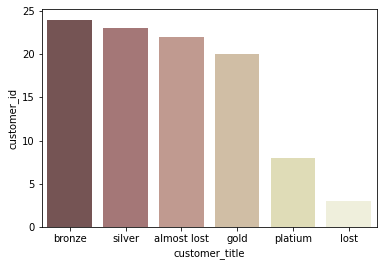

In [115]:
# Visualizing our customers' segments
sq1 = rfmseg.groupby('customer_title')['customer_id'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(data=sq1,x='customer_title',y='customer_id',palette='pink')

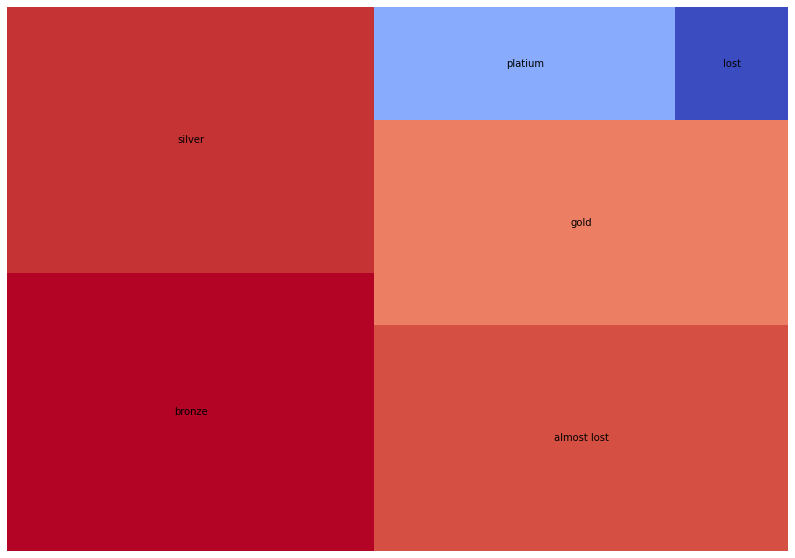

In [117]:
'''Another way to visualize to show the distribution of segments using 
squarify plot of matplotlib gives'''

import squarify
import matplotlib

cmap=matplotlib.cm.coolwarm
mini=min(sq1['customer_id'])
maxi=max(sq1['customer_id'])
norm=matplotlib.colors.Normalize(vmin=mini,vmax=maxi)
colors = [cmap(norm(value)) for value in sq1['customer_id']]
fig=plt.gcf()
ax=fig.add_subplot()
fig.set_size_inches(14,10)
squarify.plot(sizes=sq1['customer_id'],
             label=sq1.customer_title,alpha=1,color=colors)
plt.axis('off')
plt.show()

In [41]:
#Counting the number of unique values in merchant suburb
final_cleaned_data['merchant_suburb'].nunique()

1609

In [42]:
#Printing the suburb with the most transactions within the dataset
suburb_frequency=final_cleaned_data
suburb_frequency=suburb_frequency.groupby('merchant_suburb')['transaction_id'].nunique()
suburb_frequency.reset_index()
suburb_frequency.columns=['merchant_suburb','frequency']
suburb_frequency.sort_values(ascending=False).head(25)

merchant_suburb
Melbourne        4581
Sydney            233
Southport          82
Brisbane City      79
Chatswood          55
Perth              45
Adelaide           44
Broadbeach         41
Mount Gambier      41
Parramatta         39
North Sydney       37
Broken Hill        36
Richmond           35
Ringwood           35
Darwin City        35
Ceduna             33
Nowra              33
Robina             33
Castlemaine        33
Liverpool          32
Brookvale          32
Doncaster          31
Docklands          30
Preston            30
Mansfield          30
Name: transaction_id, dtype: int64

<AxesSubplot:ylabel='Frequency'>

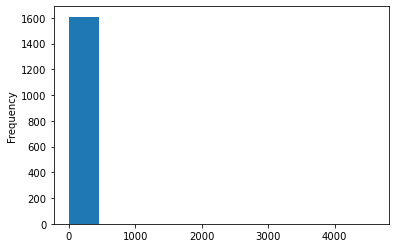

In [43]:
suburb_frequency.plot(kind='hist')

In [44]:
#Printing the state with most transactions within the dataset
state_frequency=final_cleaned_data
state_frequency=state_frequency.groupby('merchant_state')['transaction_id'].nunique()
state_frequency.reset_index()
state_frequency.columns=['merchant_state','frequency']
state_frequency.sort_values(ascending=False).head(25)

merchant_state
NSW    6495
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: transaction_id, dtype: int64

<AxesSubplot:ylabel='Frequency'>

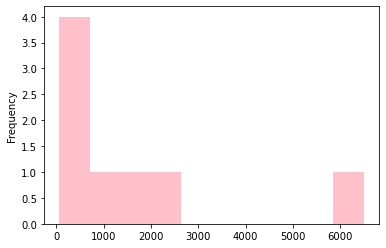

In [45]:
state_frequency.plot(kind='hist',color='pink')

In [125]:
#the amount of transactions that female and male have made
gender=final_cleaned_data
gender=gender.groupby('gender')['transaction_id'].nunique()
gender.reset_index()
gender.columns=['gender','frequency']
gender.sort_values(ascending=False).head()

gender
M    6285
F    5758
Name: transaction_id, dtype: int64

In [47]:
#The number of female customers and male customers
gender=final_cleaned_data
gender=gender.groupby('gender')['customer_id'].nunique()
gender.reset_index()
gender.columns=['gender','frequency']
gender.sort_values(ascending=False).head()

gender
M    56
F    44
Name: customer_id, dtype: int64

In [122]:
#printing the amount of transactions that have card and not have card
card_present=final_cleaned_data
card_present=card_present.groupby('card_present_flag')['transaction_id'].nunique()
card_present.reset_index()
card_present.columns=['card_present','frequency']
card_present.sort_values(ascending=False).head()

card_present_flag
1.0    10520
0.0     1523
Name: transaction_id, dtype: int64

<AxesSubplot:xlabel='card_present_flag'>

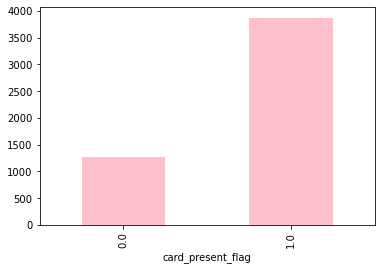

In [121]:
card_present.plot(kind='bar',color='pink')

In [50]:
#printing the amount of credit and debit movement
movement=final_cleaned_data
movement=movement.groupby('movement')['transaction_id'].nunique()
movement.reset_index()
movement.columns=['movement','frequency']
movement.sort_values(ascending=False).head()

movement
debit     11160
credit      883
Name: transaction_id, dtype: int64

C:\Users\zipzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transactions by movement')

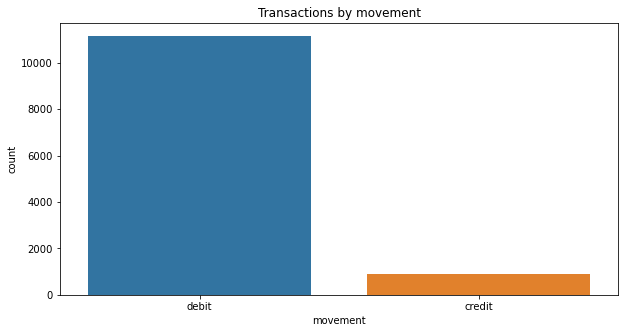

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(final_cleaned_data.movement)
plt.title('Transactions by movement')

In [68]:
# Adding age range column
final_cleaned_data['age_by_decade'] = pd.cut(x=final_cleaned_data['age'], bins=[9,19, 29, 39, 49,59,69], labels=['10s', '20s', '30s','40s','50s','60s'])
final_cleaned_data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,recency,age_by_decade
0,authorized,1,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,152.705,2018-08-01,...,QLD,2018-08-01T01:01:15.000+0000,16.2500,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,91.0,20s
1,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,152.705,2018-08-01,...,NSW,2018-08-01T01:13:45.000+0000,14.1900,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,91.0,20s
2,authorized,1,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,152.705,2018-08-01,...,NSW,2018-08-01T01:26:15.000+0000,6.4200,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,91.0,30s
3,authorized,1,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.220,2018-08-01,...,QLD,2018-08-01T01:38:45.000+0000,40.9000,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,91.0,40s
4,authorized,1,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,152.705,2018-08-01,...,QLD,2018-08-01T01:51:15.000+0000,4.3084,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,91.0,20s


In [118]:
#Printing the age range that did transactions the most
age_by_decade=final_cleaned_data
age_by_decade=age_by_decade.groupby('age_by_decade')['amount'].nunique()
age_by_decade.reset_index()
age_by_decade.columns=['age_by_decade','frequency']
age_by_decade.sort_values(ascending=False).head(10)

age_by_decade
20s    2562
30s    1856
40s    1079
10s     677
50s     133
60s     128
Name: amount, dtype: int64

C:\Users\zipzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by age')

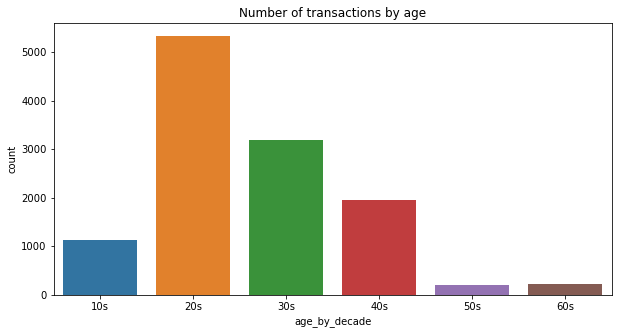

In [119]:
plt.figure(figsize=(10,5))
sns.countplot(final_cleaned_data.age_by_decade)
plt.title('Number of transactions by age')

In [53]:
#printing the amount of transactions that either authorized ot posted
status=final_cleaned_data
status=status.groupby('status')['transaction_id'].nunique()
status.reset_index()
status.columns=['status','frequency']
status.sort_values(ascending=False).head()

status
authorized    7717
posted        4326
Name: transaction_id, dtype: int64

Text(0, 0.5, 'Transaction volume')

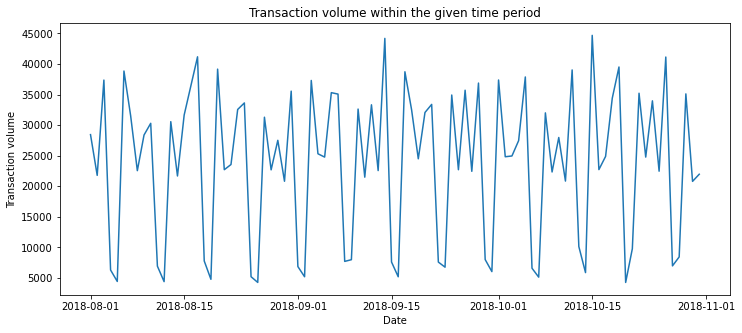

In [54]:
daily_amount = pd.DataFrame(final_cleaned_data.groupby('date').amount.sum())
fig,ax = plt.subplots (figsize = (12,5))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title('Transaction volume within the given time period')
plt.xlabel('Date')
plt.ylabel('Transaction volume')

In [60]:
#Transaction description (types of transations)
final_cleaned_data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

C:\Users\zipzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by category')

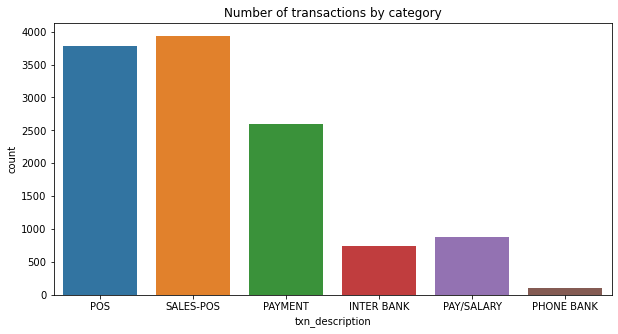

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(final_cleaned_data.txn_description)
plt.title('Number of transactions by category')

In [64]:
#Average transaction volume by category
final_cleaned_data[['txn_description','amount']].groupby('txn_description',as_index=False).mean().sort_values(by='amount',ascending=False)

,txn_description,amount
1,PAY/SALARY,1773.543137
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
5,SALES-POS,39.538698
4,POS,39.161081


Text(0.5, 1.0, 'Average transaction volume by category')

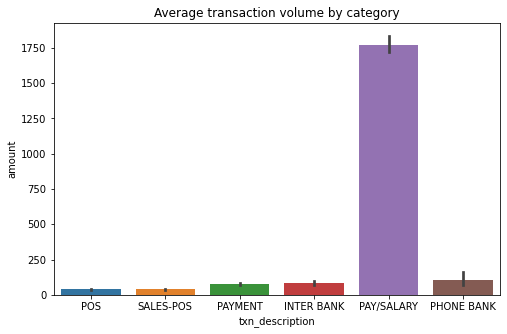

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x='txn_description',y='amount',data=final_cleaned_data)
plt.title('Average transaction volume by category')

In [73]:
#presenting the purchases amount
purchase_amount = final_cleaned_data.loc[(final_cleaned_data.txn_description == 'POS')|(final_cleaned_data.txn_description=='SALES-POS'),'amount']
purchase_amount.head()

0    16.2500
1    14.1900
2     6.4200
3    40.9000
4     4.3084
Name: amount, dtype: float64

C:\Users\zipzi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase transaction amount')

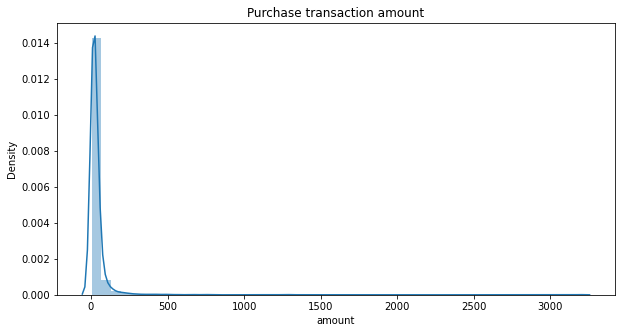

In [74]:
plt.figure(figsize=(10,5))
sns.distplot(purchase_amount)
plt.title('Purchase transaction amount')

In [75]:
purchase_amount.describe()

count    7717.000000
mean       39.353584
std       122.705326
min         4.308400
25%        12.080000
50%        19.700000
75%        33.910000
max      3195.010000
Name: amount, dtype: float64

C:\Users\zipzi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall transaction amount')

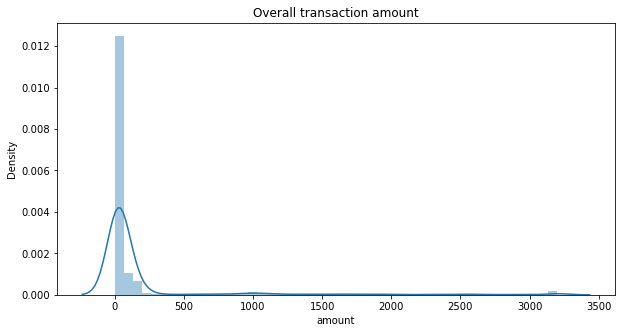

In [76]:
plt.figure(figsize=(10,5))
sns.distplot(final_cleaned_data.amount)
plt.title('Overall transaction amount')

In [77]:
final_cleaned_data.amount.describe()

count    12043.000000
mean       178.242232
std        521.148069
min          4.308400
25%         16.000000
50%         29.000000
75%         53.655000
max       3195.010000
Name: amount, dtype: float64

Text(0.5, 1.0, 'Average transaction volume by month')

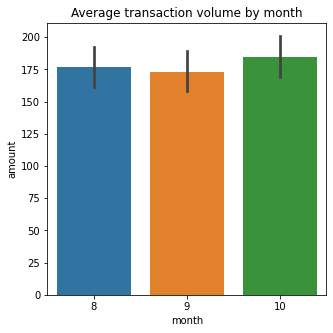

In [91]:
#Transaction volume over time by month
final_cleaned_data['month']=pd.DatetimeIndex(final_cleaned_data.date).month
plt.figure(figsize=(5,5))
sns.barplot(x='month',y='amount',data=final_cleaned_data)
plt.title('Average transaction volume by month')

C:\Users\zipzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions per month')

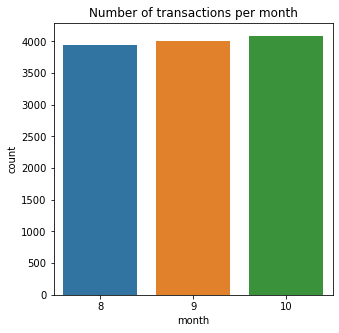

In [98]:
plt.figure(figsize=(5,5))
sns.countplot(final_cleaned_data.month)
plt.title('Number of transactions per month')

Text(0.5, 1.0, 'Average transaction volume by day of the week')

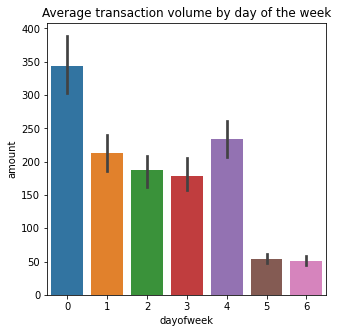

In [102]:
#Transaction volume over day of the week
final_cleaned_data['dayofweek']=pd.DatetimeIndex(final_cleaned_data.date).dayofweek
plt.figure(figsize=(5,5))
sns.barplot(x='dayofweek',y='amount',data=final_cleaned_data)
plt.title('Average transaction volume by day of the week')

C:\Users\zipzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions per day')

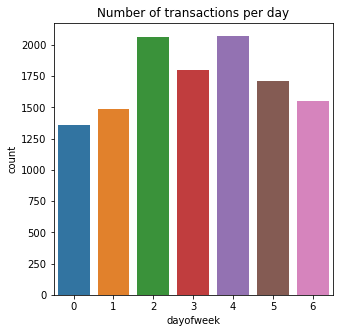

In [95]:
plt.figure(figsize=(5,5))
sns.countplot(final_cleaned_data.dayofweek)
plt.title('Number of transactions per day')

In [99]:
'''Simplify the categories in order to find out most money spent 
on which category,  we group all transactions into 3 categories: 
- Salary
- Purchase
- Others'''
#Grouping the transaction into 3 main categories

final_cleaned_data.loc[final_cleaned_data.txn_description=='PAY/SALARY','category']='Salary'
final_cleaned_data.loc[(final_cleaned_data.txn_description=='SALES-POS')|(final_cleaned_data.txn_description=='POS'),'category']='Purchase'
final_cleaned_data.category.fillna('Others',inplace=True)
final_cleaned_data[['txn_description','category']].head()

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase


Text(0.5, 0, 'Day of week')

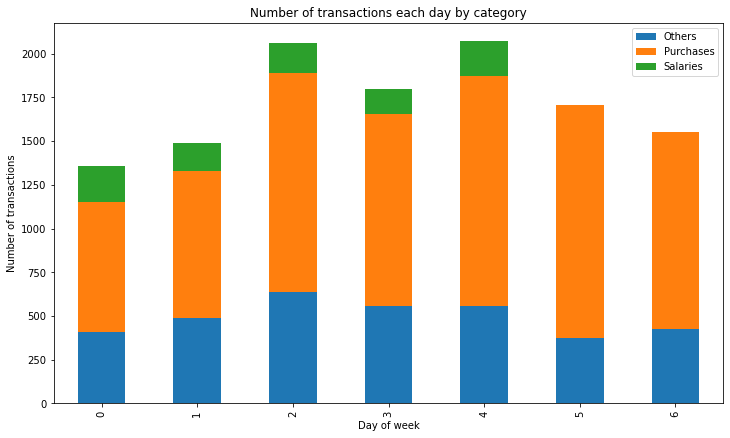

In [100]:
#Plotting the transactions each day by categories
stacked_barplot = pd.DataFrame(final_cleaned_data.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Day of week")

Text(0.5, 0, 'Hour')

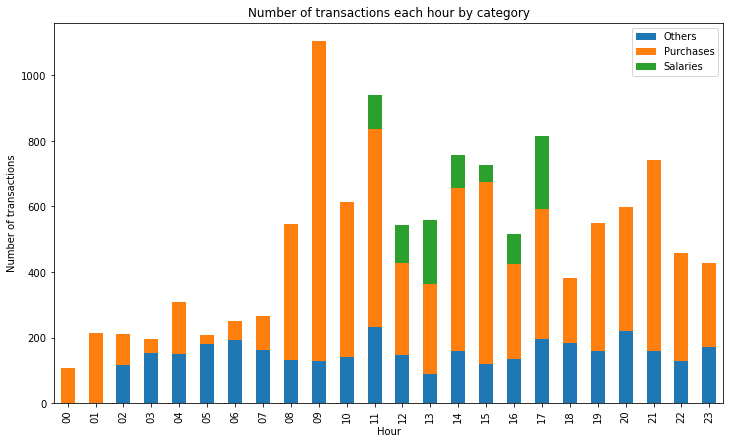

In [129]:
'''Plotting the transactions per hour by categories'''
final_cleaned_data["hour"] = [time.split(":")[0] for time in final_cleaned_data.extraction]
stacked_barplot = pd.DataFrame(final_cleaned_data.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Hour")

# Summary